In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from splinx.spline import *
import jax.numpy as jnp
from jax import config

In [3]:
config.update('jax_platform_name', 'cpu')

(2, 11)


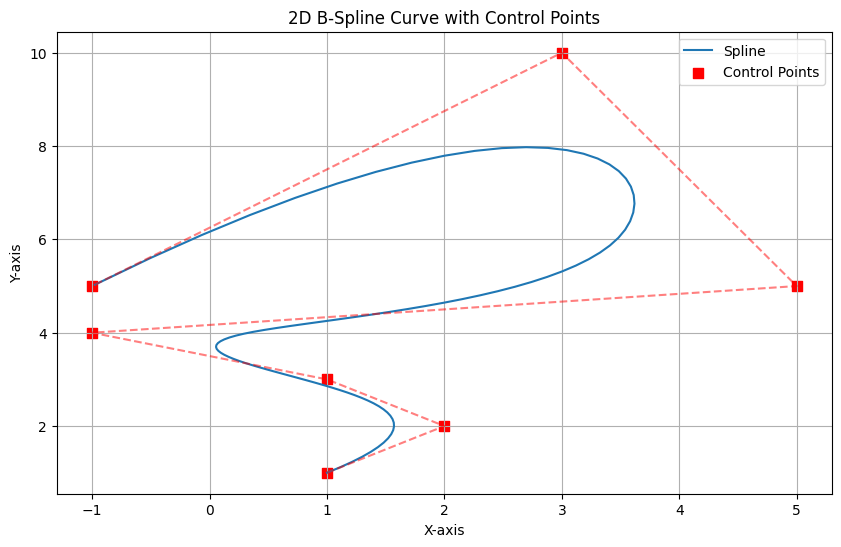

In [4]:
num_sample = 100
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, .999, num_sample)[None, :], 2, axis=0)

coef = jnp.array([[1,2,1,-1,5,3,-1],
                  [1,2,3,4,5,10,5]])
num_grid_interval = coef.shape[1] - k
grids = jnp.einsum('i,j->ij', jnp.ones(2,), jnp.linspace(-1,1,num_grid_interval+1))
extended_grids = extend_grid(grids, k, clamp=True)

print(extended_grids.shape)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

plt.figure(figsize=(10, 6))
plt.plot(y_eval[0, :], y_eval[1, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
plt.scatter(ctrl_points_x, ctrl_points_y, marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(ctrl_points_x, ctrl_points_y, 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

[[0.]
 [0.]]


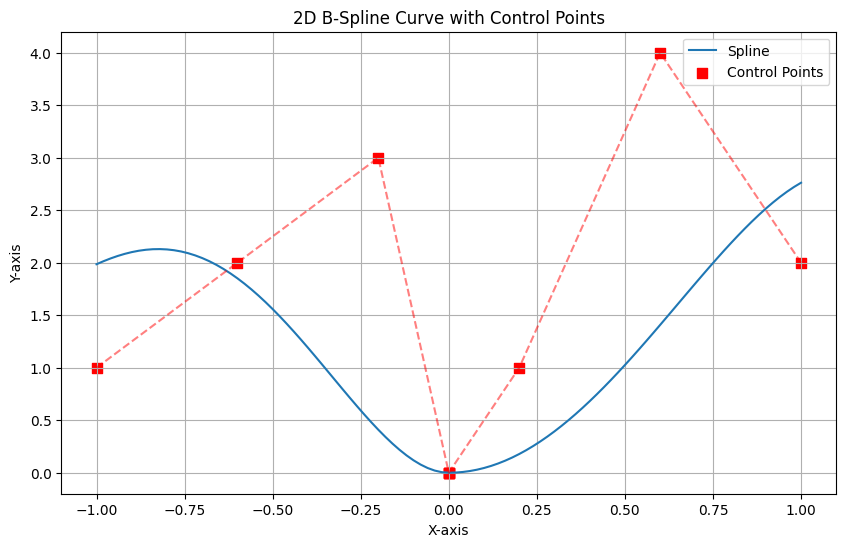

In [21]:
num_sample = 100
k = 4
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
# grid_around_zero = jnp.tile(jnp.array([-.0,0,.0]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids, coef, k=k)
# print(coef2curve(jnp.array([[-.00001,0.,.00001],[-.00001,0.,.00001]]), extended_grids, coef, k=k))
print(coef2curve(jnp.array([[0.],[0.]]), extended_grids, coef, k=k))
# print(y_eval)

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')


# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

# Plot control points
domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1]-k))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

## How to define derivative of spline?

[[0.]
 [0.]]


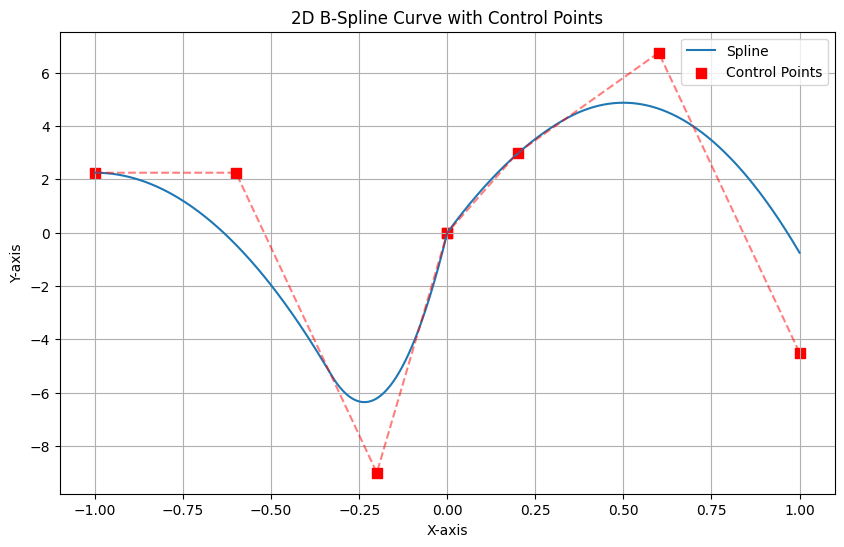

In [6]:
num_sample = 1000
k = 3
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grid_around_zero = jnp.tile(jnp.array([-.0,0,.0]), (grids.shape[0], 1))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)

coef = (coef[:,1:] - coef[:,:-1]) * k / (extended_grids[:,k+1:-1] - extended_grids[:,1:-(k+1)])

# Multiply the coeficients by the different basis functions
y_eval = coef2curve(x_eval, extended_grids[:,1:-1], coef, k=k-1)
print(coef2curve(jnp.array([[0.],[0.]]), extended_grids[:,:-1], coef, k=k))

plt.figure(figsize=(10, 6))
plt.plot(x_eval[0, :], y_eval[0, :], label='Spline')

# Extract control points for each spline
# Here, extended_grids would represent the x positions of control points if it aligns with the spline's domain
ctrl_points_x = coef[0, :]  # You might need to adjust this based on your extend_grid function
ctrl_points_y = coef[1, :]

domain = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1, coef.shape[1] - k + 1))
domain = jnp.hstack([domain[:, :domain.shape[1]//2], jnp.zeros((domain.shape[0], k-1)), domain[:, domain.shape[1]//2:]])
plt.scatter(domain[0], coef[0], marker='s', s=50, color='red', label="Control Points")  # Red circles for control points
# Optionally connect control points with lines to better visualize the influence
plt.plot(domain[0], coef[0], 'r--', alpha=0.5)  # Dashed lines connecting control points

plt.title('2D B-Spline Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

(1, 19) (1, 13)
(Array([[0.],
       [0.]], dtype=float32), Array([[ 2.9999998,  2.857143 , -6.6666665, -4.       ,  0.       ,
         0.       ,  0.       ,  0.       , 16.       , -6.6666665,
         8.571428 ,  6.       ]], dtype=float32))
(Array([[0.],
       [0.]], dtype=float32), Array([[ -0.40336046, -25.396826  ,   8.533333  ,  16.        ,
          0.        ,   0.        ,   0.        ,  64.        ,
        -72.53333   ,  40.63492   ,  -7.260504  ]], dtype=float32))


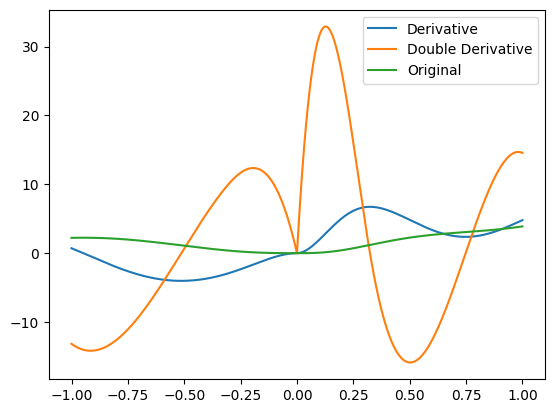

In [52]:
num_sample = 1000
k = 5
x_eval = jnp.repeat(jnp.linspace(-1, 1, num_sample+1)[None, :], 2, axis=0)

coef = jnp.array([[1,2,3,1,4,2,5,7]]) # coef must have an even number of elements
coef = jnp.hstack([coef[:,:coef.shape[1]//2], jnp.zeros((coef.shape[0], k)), coef[:,coef.shape[1]//2:]])
num_grid_interval = coef.shape[1] - 2*k
grids = jnp.einsum('i,j->ij', jnp.ones(1,), jnp.linspace(-1,1,num_grid_interval+1))

grid_around_zero = jnp.zeros((grids.shape[0], k)) # jnp.einsum('i,j->ij', jnp.ones(1,), jnp.zeros((k,))) # jnp.linspace(-.01,.01,k))
grids = jnp.hstack([grids[:,:grids.shape[1]//2], grid_around_zero, grids[:,grids.shape[1]//2:]])

extended_grids = extend_grid(grids, k)
print(extended_grids.shape, coef.shape)
# y_eval = coef2curve(x_eval, extended_grids, coef, k=k)

y_eval, new_coef = spline_derivative(x_eval, extended_grids, coef, k)
print(spline_derivative(jnp.array([[0.],[0.]]), extended_grids, coef, k))
plt.plot(x_eval[0, :], y_eval[0, :], label='Derivative')

y_eval, _ = spline_derivative(x_eval, extended_grids[:,1:-1], new_coef, k-1)
print(spline_derivative(jnp.array([[0.],[0.]]), extended_grids[:,1:-1], new_coef, k-1))
plt.plot(x_eval[0, :], y_eval[0, :], label='Double Derivative')

y_eval = coef2curve(x_eval, extended_grids, coef, k)
plt.plot(x_eval[0, :], y_eval[0, :], label='Original')

plt.legend()